In [26]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
# Step 2: Load the dataset
df=pd.read_csv(r"C:\Users\pavit\Downloads\Salary_Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [28]:
# Step 3: Prepare the dataset (X = independent, y = dependent)
X = df[['Years of Experience']].values  # Independent variable (Years of Experience/Level)
y = df['Salary'].values   # Dependent variable (Salary)

In [29]:
# Step 4: Check for NaN or Infinite values in both X and y
# Check for missing values and drop them from both X and y to ensure consistency
if df.isna().sum().sum() > 0:
    df.dropna(inplace=True)  # Drop rows with NaN values (if any)

    # After dropping rows, redefine X and y to ensure consistency in length
    X = df[['Years of Experience']].values  # Independent variable (Years of Experience/Level)
    y = df['Salary'].values   # Dependent variable (Salary)


In [30]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Step 6: Fit Simple Linear Regression Model on training data
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)


LinearRegression()

In [32]:
# Step 7: Fit Polynomial Regression Model (Degree 3) on training data
poly_features = PolynomialFeatures(degree=3)
X_poly_train = poly_features.fit_transform(X_train)  # Transform training data
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)


LinearRegression()

In [33]:
# Step 8: Predictions for Linear and Polynomial models on testing data
y_pred_linear = linear_regressor.predict(X_test)
X_poly_test = poly_features.transform(X_test)  # Transform testing data to polynomial features
y_pred_poly = poly_regressor.predict(X_poly_test)


In [34]:
# Step 9: Evaluate both models using R-squared and Adjusted R-squared
# Linear Regression
r2_linear = r2_score(y_test, y_pred_linear)
n = len(y_test)  # Number of observations
p_linear = 1  # Number of predictors in simple linear regression
adjusted_r2_linear = 1 - (1-r2_linear) * (n-1) / (n-p_linear-1)


In [35]:
# Polynomial Regression
r2_poly = r2_score(y_test, y_pred_poly)
p_poly = X_poly_test.shape[1]  # Number of predictors in polynomial regression (includes constant term)
adjusted_r2_poly = 1 - (1-r2_poly) * (n-1) / (n-p_poly-1)

print(f"Linear Regression R-squared: {r2_linear}, Adjusted R-squared: {adjusted_r2_linear}")
print(f"Polynomial Regression (Degree 3) R-squared: {r2_poly}, Adjusted R-squared: {adjusted_r2_poly}")


Linear Regression R-squared: 0.6555973709206211, Adjusted R-squared: 0.6553399698525498
Polynomial Regression (Degree 3) R-squared: 0.7468827862690435, Adjusted R-squared: 0.7461243826323964


In [36]:
# Step 10: Performance Metrics (MSE, RMSE)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_poly = mean_squared_error(y_test, y_pred_poly)

rmse_linear = np.sqrt(mse_linear)
rmse_poly = np.sqrt(mse_poly)

print(f"Linear Regression MSE: {mse_linear}, RMSE: {rmse_linear}")
print(f"Polynomial Regression (Degree 3) MSE: {mse_poly}, RMSE: {rmse_poly}")


Linear Regression MSE: 982050061.9154333, RMSE: 31337.6779917631
Polynomial Regression (Degree 3) MSE: 721753420.0618886, RMSE: 26865.468915726906


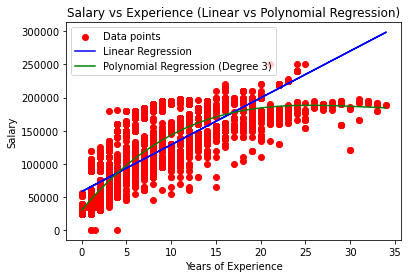

In [37]:
# Step 11: Plot both models on the same graph (using the full dataset for visualization)
plt.scatter(X, y, color='red', label='Data points')

# Linear Regression Line
plt.plot(X, linear_regressor.predict(X), color='blue', label='Linear Regression')

# Polynomial Regression Curve
X_grid = np.arange(min(X), max(X), 0.1)  # To make the curve smoother
X_grid = X_grid.reshape(len(X_grid), 1)
plt.plot(X_grid, poly_regressor.predict(poly_features.transform(X_grid)), color='green', label='Polynomial Regression (Degree 3)')

plt.title("Salary vs Experience (Linear vs Polynomial Regression)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()